In [16]:
#from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
import numpy as np
import pandas as pd
# Загрузка датасета
#data = load_boston()
np.random.seed(0)
n_samples = 100
ad_spending=np.random.uniform(100,1000,n_samples)
sales=50+0.5+ad_spending+np.random.normal(0,50,n_samples)
data=pd.DataFrame({'AdSpending':ad_spending,'Sales':sales})
X = data[['AdSpending']]
y = data[['Sales']]
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)
# Создание и обучение модели
model = LinearRegression()
model.fit(X_train, y_train)
# Получение предсказаний на тестовой выборке
y_pred = model.predict(X_test)
# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
# Вывод результатов
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:.2f}")

MAE: 40.07
MSE: 2294.38
RMSE: 47.90
R^2: 0.95


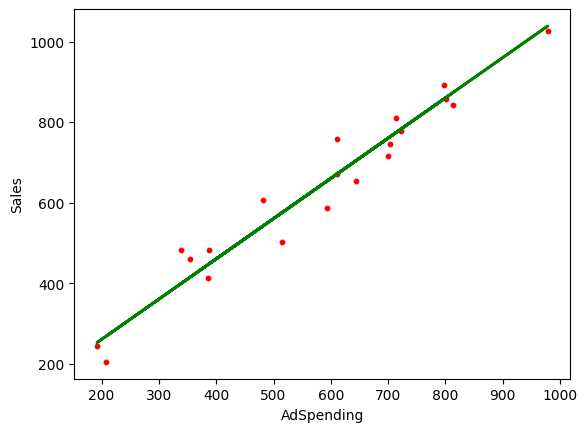

In [17]:
import matplotlib.pyplot as plt
plt.plot(X_test, y_pred, linewidth=2, c='g')
plt.scatter(X_test, y_test, s=10, c='r')
plt.xlabel('AdSpending')
plt.ylabel('Sales')
plt.show()

## Матрица ошибок

In [18]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Загрузка датасета
data = load_breast_cancer()
X = data.data
y = data.target
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [21]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)
# Создание и обучение модели дамми-классификатора
model_dummy = DummyClassifier(strategy='most_frequent')
model_dummy.fit(X_train, y_train)
y_pred_dummy = model_dummy.predict(X_test)

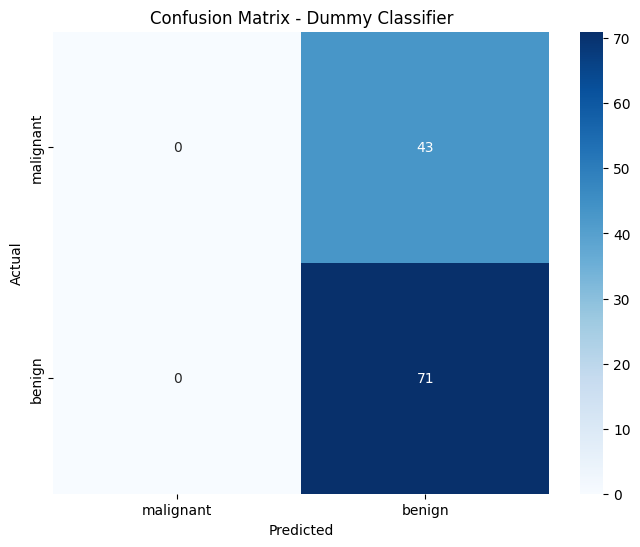

In [22]:
# Графическая матрица ошибок для модели дамми-классификатора
cm_dummy = confusion_matrix(y_test, y_pred_dummy)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dummy, annot=True, fmt='d', cmap='Blues',
xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Dummy Classifier')
plt.show()

## Теперь логистическая регрессия:

/Users/a.rukaff/Python/Python/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


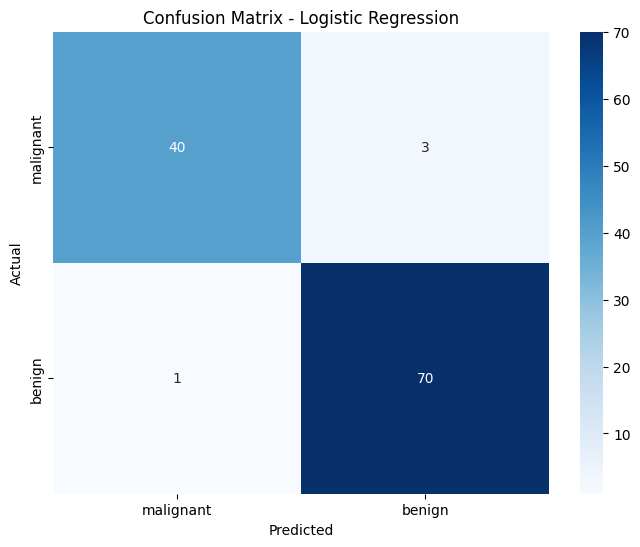

In [23]:
from sklearn.linear_model import LogisticRegression
# Создание и обучение модели логистической регрессии
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Графическая матрица ошибок для модели логистической регрессии
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


## И, наконец, метод опорных векторов:

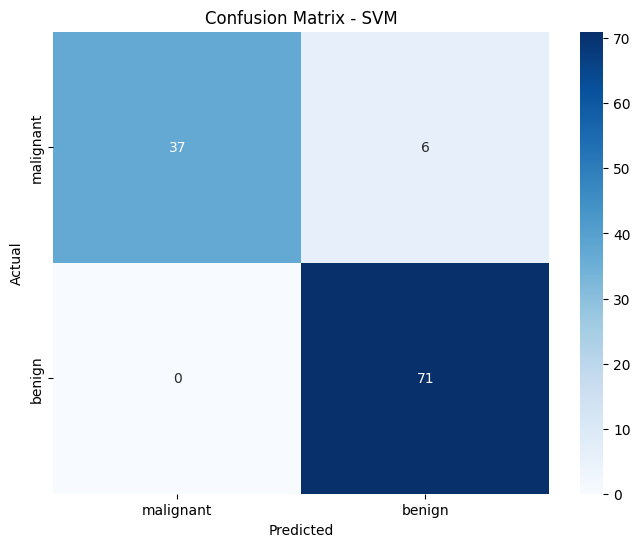

In [24]:
from sklearn.svm import SVC
# Создание и обучение модели метода опорных векторов (SVM)
model_svm = SVC()
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)
# Графическая матрица ошибок для модели метода опорных векторов (SVM)
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues',
xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()

In [25]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
# делаем стандартные процедуры, делим выборку
data = load_breast_cancer()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
# вызываем методы метрик
predictions = model.predict(X_test)
recall = recall_score(y_test, predictions)
precision = precision_score(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)
print(recall)
print(precision)
print(accuracy)

0.9859154929577465
0.958904109589041
0.9649122807017544


/Users/a.rukaff/Python/Python/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
